Домашнее задание «деревья решений»

Для выполнения домашнего задания необходимо взять файл boston house-prices datase (sklearn.datasets.load_boston) 
и построить модель.

По аналогии задания к лекции «Классификация: Логистическая регрессия и SVM»
    
А именно построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
 
from statistics import mean
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Разделим датасет на данные с признаками X и целевой переменной y
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=63 )  

In [5]:
# функция получения accuracy модели

def get_DesTree_score(X_train, X_test, y_train, y_test, 
                      max_depth=None, max_features='auto', max_leaf_nodes=None, min_samples_leaf=1):
    model = DecisionTreeRegressor(max_depth=max_depth, max_features=max_features, 
                                  max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test, y_test)

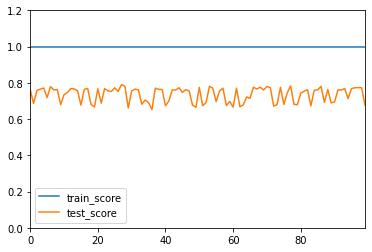

In [6]:
# Посмотрим score на стандартных настройках
train = []
test = []
for i in range(100):
    k, l = (get_DesTree_score(X_train, X_test, y_train, y_test))
    train.append(k)
    test.append(l)
    
plt.plot(train, label='train_score')
plt.plot(test, label='test_score')
plt.axis([0, i, 0, 1.2])
plt.legend()
None

Видно, что на train score всегда равен 1, а test в районе 0.7. Модель переобучена, но в принципе дает хороший результат

0	0.4962521338110867	0.3184316880705561
1	0.7311239188156906	0.6123264803348634
2	0.8461838658380644	0.6715153745309786
3	0.908800136074617	0.6657722731775286
4	0.9415122000060975	0.6883456266528242
5	0.9593338405811723	0.7696234721657718
6	0.9729066966419047	0.720420897533959
7	0.9829483994267117	0.755333271108976
8	0.9900467809242618	0.7610239070530573
9	0.9947850147305632	0.6679242301142694
10	0.9972708899210788	0.7657664832542896
11	0.9985511875105987	0.7702421891620645
12	0.999538306842146	0.7702995265961523
13	0.9999335766287465	0.693010139550247
14	0.9999920904664839	0.7668892772062448
15	0.9999998328971792	0.7489404602421847
16	1.0	0.7398866714135803
17	1.0	0.766066292343948
18	1.0	0.7652791762815803
19	1.0	0.768509713208855
Wall time: 445 ms


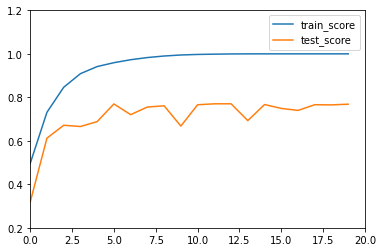

In [7]:
%%time
# Посмотрим лучший score в зависимости от max_depth
train = []
test = []
t = 0
for i in range(1,21):
    k, l = get_DesTree_score(X_train, X_test, y_train, y_test, 
                             max_depth=i)
    #if t < temp_score:
        #t = temp_score
        #d.clear()
    train.append(k)
    test.append(l)

plt.plot(train, label='train_score')
plt.plot(test, label='test_score')
plt.axis([0, i, 0.2, 1.2])
plt.legend()
None

for i in range(len(test)):
    print (i, train[i], test[i], sep='\t')

Видно, что с увеличением max_depth растет score. max_depth от 4 score находится на одном уровне ~0.75

0	1.0	0.768509713208855
1	1.0	0.768509713208855
2	1.0	0.768509713208855
3	1.0	0.768509713208855
4	1.0	0.768509713208855
5	1.0	0.768509713208855
6	1.0	0.768509713208855
7	1.0	0.768509713208855
8	1.0	0.768509713208855
9	1.0	0.768509713208855
10	1.0	0.768509713208855
11	1.0	0.768509713208855
12	1.0	0.768509713208855
13	1.0	0.768509713208855
14	1.0	0.768509713208855
15	1.0	0.768509713208855
16	1.0	0.768509713208855
17	1.0	0.768509713208855
18	1.0	0.768509713208855
19	1.0	0.768509713208855
Wall time: 398 ms


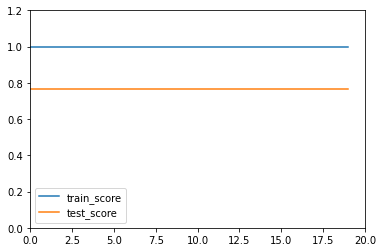

In [8]:
%%time
# Посмотрим лучший score в зависимости от min_samples_leaf
train = []
test = []
t = 0
for i in range(1, 21):
    temp_score = get_DesTree_score(X_train, X_test, y_train, y_test, 
                                   max_depth=4, min_samples_leaf=i)
    #if t < temp_score:
        #t = temp_score
        #d.clear()
    train.append(k)
    test.append(l)

plt.plot(train, label='train_score')
plt.plot(test, label='test_score')
plt.axis([0, i, 0, 1.2])
plt.legend()
None

for i in range(len(test)):
    print (i, train[i], test[i], sep='\t')

На данном примере min_samples_leaf от 1 до 20 на одном уровне. Количество объестов на листе не влияет на score

0 1.0 0.768509713208855
1 1.0 0.768509713208855
2 1.0 0.768509713208855
3 1.0 0.768509713208855
4 1.0 0.768509713208855
5 1.0 0.768509713208855
6 1.0 0.768509713208855
7 1.0 0.768509713208855
8 1.0 0.768509713208855
9 1.0 0.768509713208855
10 1.0 0.768509713208855
11 1.0 0.768509713208855
12 1.0 0.768509713208855
13 1.0 0.768509713208855
14 1.0 0.768509713208855
15 1.0 0.768509713208855
16 1.0 0.768509713208855
17 1.0 0.768509713208855
18 1.0 0.768509713208855
Wall time: 386 ms


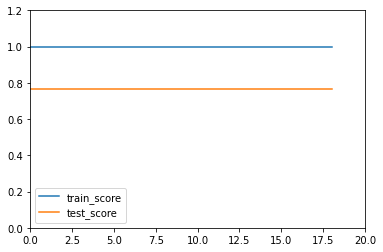

In [9]:
%%time
# Посмотрим лучший score в зависимости от max_leaf_nodes
train = []
test = []
t = 0
for i in range(2, 21):
    temp_score = get_DesTree_score(X_train, X_test, y_train, y_test, 
                                   max_depth=4, max_leaf_nodes=i)
    #if t < temp_score:
        #t = temp_score
        #d.clear()
    train.append(k)
    test.append(l)

plt.plot(train, label='train_score')
plt.plot(test, label='test_score')
plt.axis([0, i, 0, 1.2])
plt.legend()
None

for i in range(len(test)):
    print (i, train[i], test[i])

На данном примере max_leaf_nodes от 2 до 20 на одном уровне. Количество объестов на листе не влияет на score

0 1.0 0.768509713208855
1 1.0 0.768509713208855
2 1.0 0.768509713208855
Wall time: 124 ms


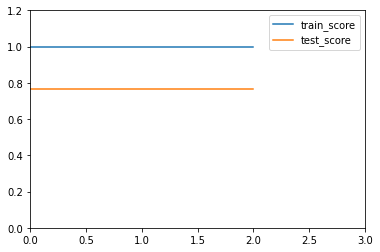

In [10]:
%%time
# Посмотрим лучший score в зависимости от max_features
train = []
test = []
t = 0
for i in ['auto', 'sqrt', 'log2']:
    temp_score = get_DesTree_score(X_train, X_test, y_train, y_test, 
                                   max_depth=4, max_features=i)
    #if t < temp_score:
        #t = temp_score
        #d.clear()
    train.append(k)
    test.append(l)

plt.plot(train, label='train_score')
plt.plot(test, label='test_score')
plt.axis([0, 3, 0, 1.2])
plt.legend()
None

for i in range(len(test)):
    print (i, train[i], test[i])

На данном примере max_features на одном уровне, параметр не влияет на score

In [29]:
model = DecisionTreeRegressor(max_depth=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=63)  
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

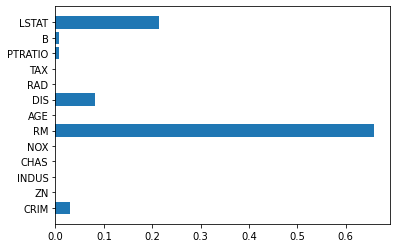

In [30]:
# Посмортим какие признаки больше всего влияют на модель
plt.barh(np.arange(len(model.feature_importances_)), model.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns)
None


'RM', 'LSTAT', 'DIS', 'CRIM' влияют на модель больше всего

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X[['RM', 'LSTAT', 'DIS', 'CRIM']], 
                                                    y, train_size=0.7, random_state=63)  
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9049822472156713, 0.7268405995063099)

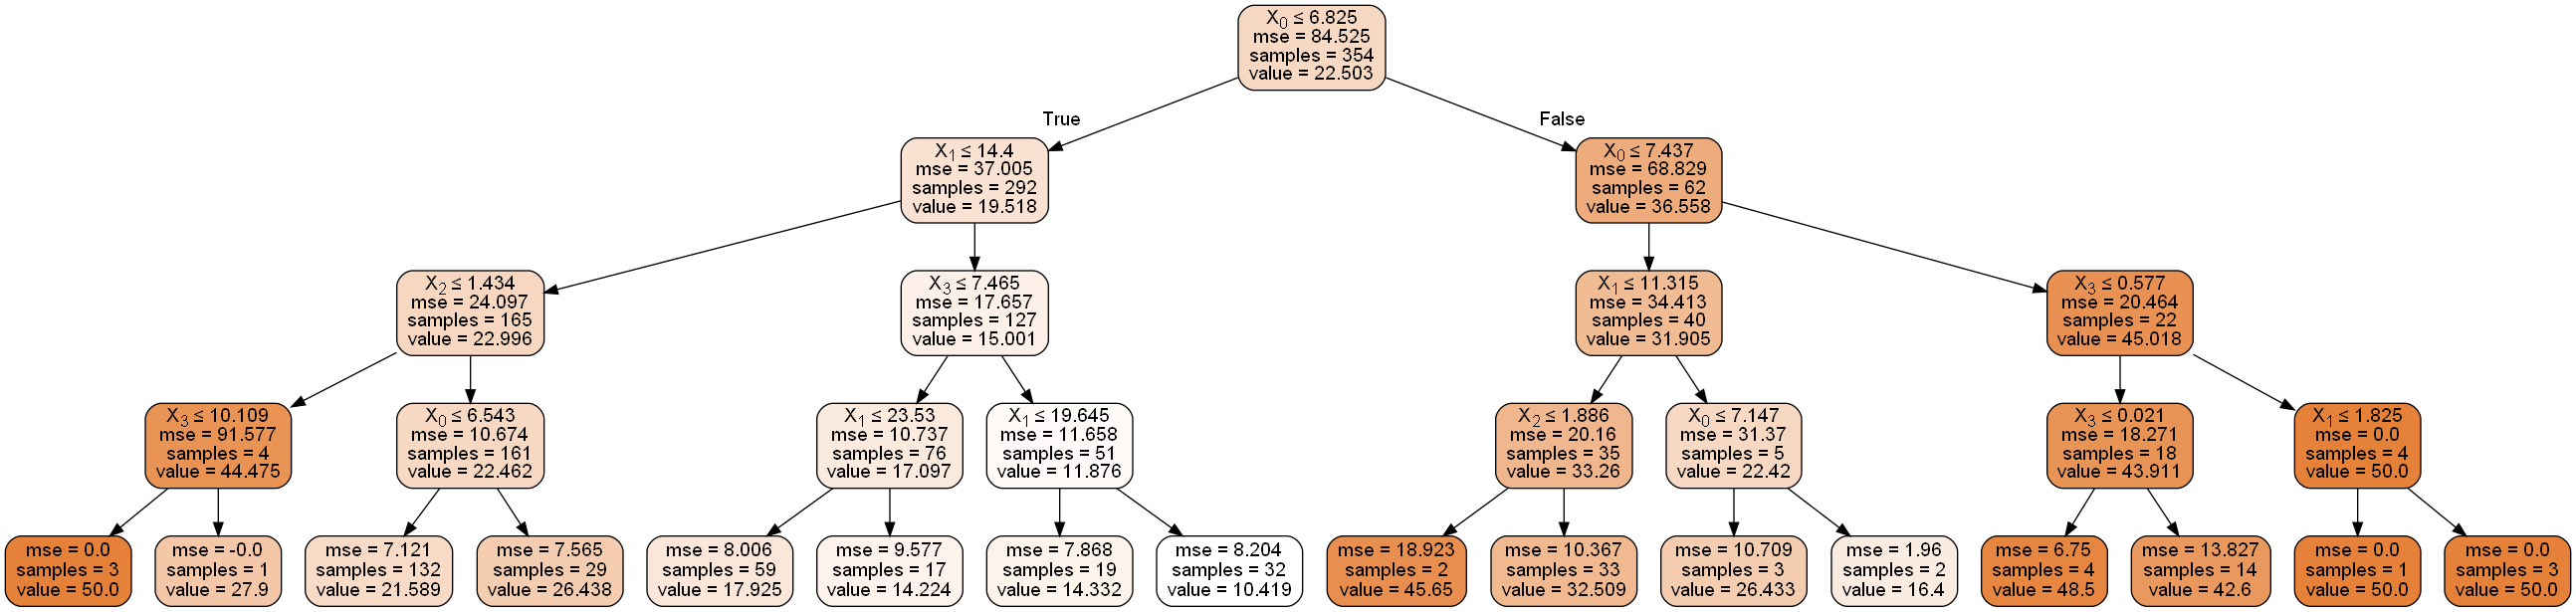

In [37]:
# Визуализируем дерево решений
from io import StringIO   
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())